2.0 0.6000000000000001 [-2.]
f1:1.0
recall:1.0
precision:1.0


/Users/tristan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


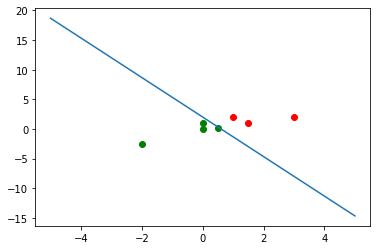

In [644]:


from sklearn.linear_model import Perceptron
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt#约定俗成的写法plt
from sklearn.metrics import f1_score, recall_score, precision_score

def plot(X,y,k,b):
    M = len(X)
    #正例和反例
    positive_x1 = [X[i,0] for i in range(M) if y[i] == 1]
    positive_x2 = [X[i,1] for i in range(M) if y[i] == 1]
    negetive_x1 = [X[i,0] for i in range(M) if y[i] == -1]
    negetive_x2 = [X[i,1] for i in range(M) if y[i] == -1]
    plt.figure() # 定义一个图像窗口
    colors1 = 'red' #点的颜色
    colors2 = 'green'


    plt.scatter(positive_x1, positive_x2, c=colors1)
    plt.scatter(negetive_x1, negetive_x2, c=colors2)

    x = np.linspace(-5, 5, 50) # 从0到1，等分50分

    y = k * x  + b

    plt.plot(x, y) # 绘制曲线 y
    plt.show()
   
# x1+ X2 - 4 = 0
from sklearn.datasets import make_classification
X = np.array([[0, 1], [0.5, 0.2], [1, 2], [1.5, 1], [3, 2], [-2, -2.5], [0, 0]])
y = np.array([[-1], [-1], [1], [1], [1], [-1], [-1]])

model = Perceptron().fit(X, y)
predict = model.predict(X)


print(model.coef_[0][0],model.coef_[0][1], model.intercept_)


print(f"f1:{f1_score(y, predict)}\nrecall:{recall_score(y, predict)}\nprecision:{precision_score(y, predict)}")

plot(X,y,-model.coef_[0][0]/model.coef_[0][1],-model.intercept_)

权重不再更新


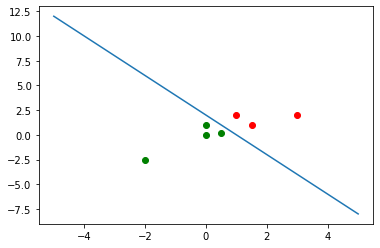

[2. 1.] [-2]


In [646]:
def my_perceptron(X, y, w=np.zeros(n), b=0, alpha=1):
    cnt = 1
    while True:
        temp_w = w
        temp_b = b
        for i in range(len(X)):
            if ((np.dot(X[i], w) + b) * y[i])[0] <= 0:
                w = w + (alpha * X[i] * y[i])
                b = b + alpha * y[i]
        if (temp_w == w).all() and temp_b == b:
            print("权重不再更新")
            break
        cnt += 1
        if cnt > 50:
            print("迭代次数完成")
            break
    plot(X,y,-w[0]/w[1],-b[0]/w[1])
    print(w,b)
my_perceptron(X,y)

In [140]:
X

,0,1
0,0,2
1,1,2
2,0,3
3,2,2


/Users/tristan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, 1])